In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Unity Env setup

In [2]:
from unityagents import UnityEnvironment

In [3]:
env = UnityEnvironment(file_name = "Tennis.app", no_graphics = False)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])  

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


## DDPG Agent imports

In [6]:
import os
import sys
import numpy as np
import torch 

sys.path.append('src')
from maddpg import MADDPGAgent
from replaybuffers import ReplayBuffer
from utils import train_agent, plot_scores_losses

### Hyperparameters settings 

In [7]:
BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 256         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-2              # for soft update of target parameters               
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 1e-3        # learning rate of the critic

UPDATE_EVERY = 1        # how often to update the network
WEIGHT_DECAY = 0
hidden_1_size = 256
hidden_2_size = 128

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [21]:
state_size

24

In [19]:
agents[0].critic_train

CriticQNetwork(
  (fc_1): Linear(in_features=52, out_features=256, bias=True)
  (fc_2): Linear(in_features=256, out_features=128, bias=True)
  (fc_3): Linear(in_features=128, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=1, bias=True)
)

In [20]:
agents[0].actor_train

ActorQNetwork(
  (fc_1): Linear(in_features=24, out_features=256, bias=True)
  (fc_2): Linear(in_features=256, out_features=256, bias=True)
  (fc_3): Linear(in_features=256, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=2, bias=True)
)

### Create Agent

In [8]:
experience_buffer = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed=2, device = device)

agents = [ MADDPGAgent(
                 agent_index = i,
                 state_size  = state_size, 
                 action_size = action_size, 
                 seed        = i,
                 actor_lr=LR_ACTOR,
                 critic_lr=LR_CRITIC,
                 
                 weight_decay=WEIGHT_DECAY,
                 tau=TAU,
                 update_every=UPDATE_EVERY,
                 gamma = GAMMA,
                 device = device,
                 hidden_1_size = hidden_1_size,
                 hidden_2_size = hidden_2_size,
                 checkpoint_dir = "agent_{}".format(i)) 
          for i in range(2)]

## Train the agent until target mean score above 0.6 is reached

Episode 50	Average Score: 0.03, epsilon=0.8991


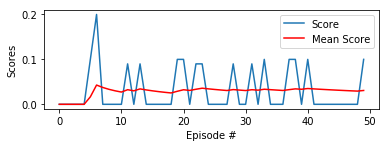

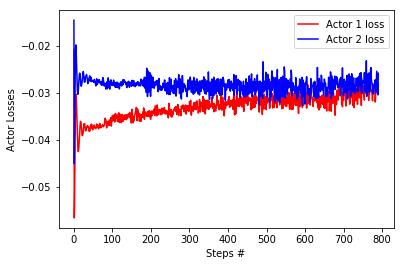

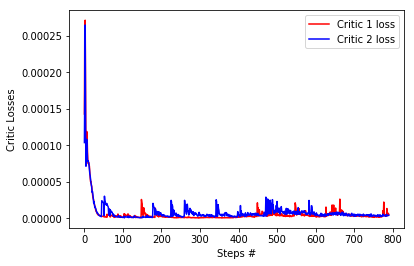

Episode 100	Average Score: 0.02, epsilon=0.8946


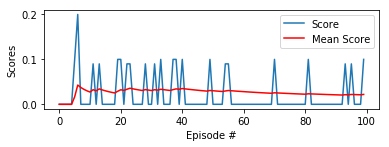

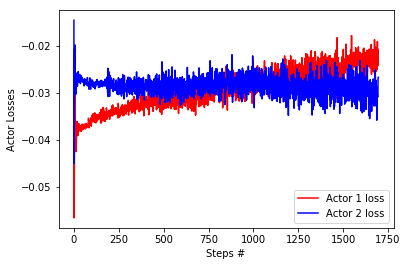

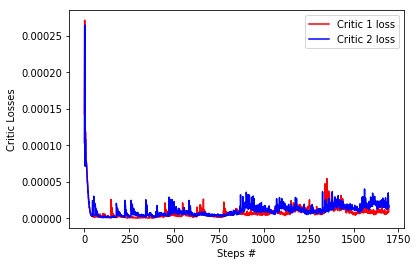

Episode 150	Average Score: 0.02, epsilon=0.8884


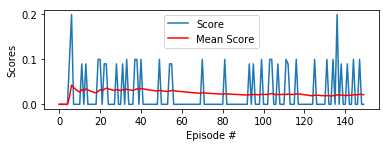

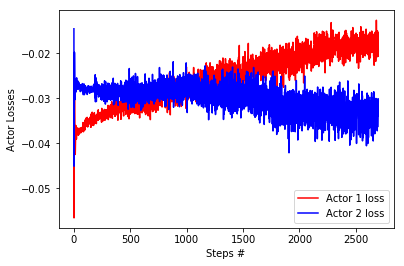

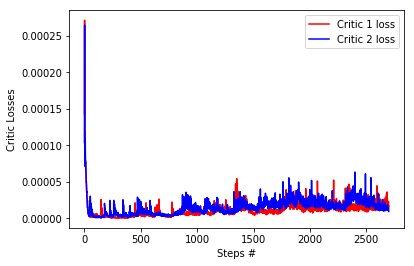

Episode 200	Average Score: 0.03, epsilon=0.8804


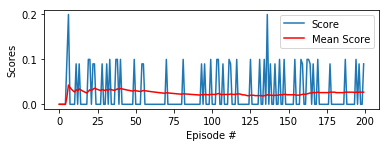

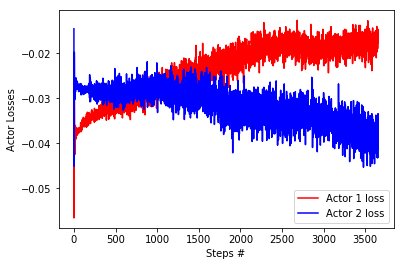

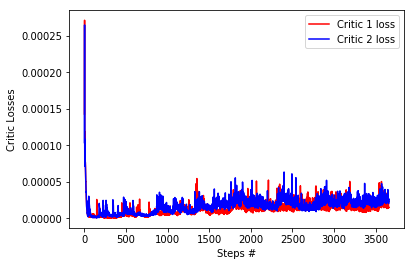

Episode 250	Average Score: 0.06, epsilon=0.8760


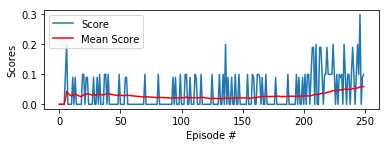

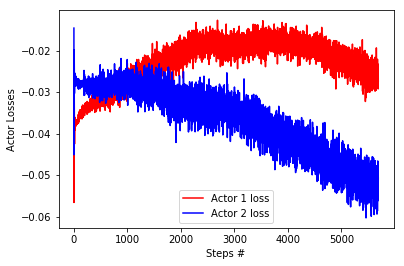

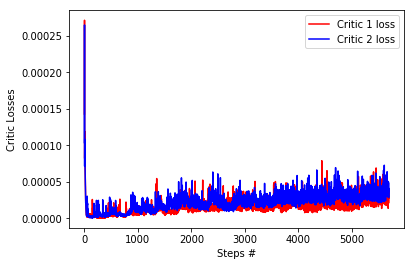

Episode 300	Average Score: 0.09, epsilon=0.8743


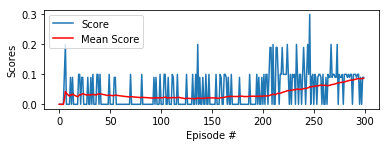

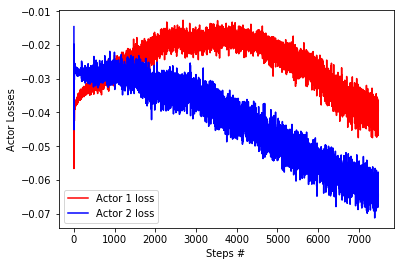

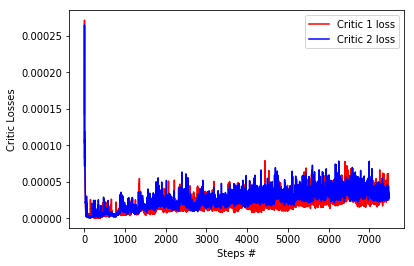

Episode 350	Average Score: 0.09, epsilon=0.8682


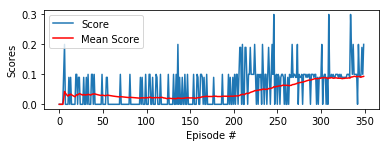

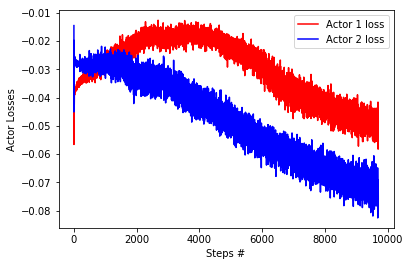

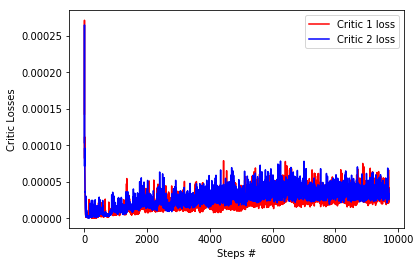

Episode 400	Average Score: 0.14, epsilon=0.8647


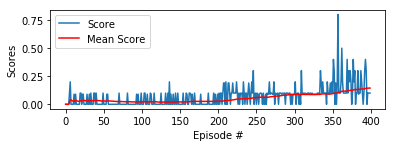

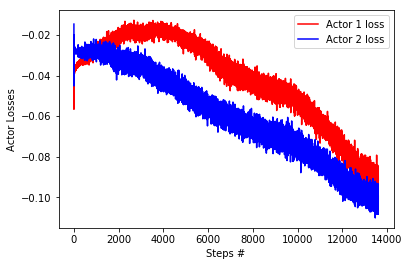

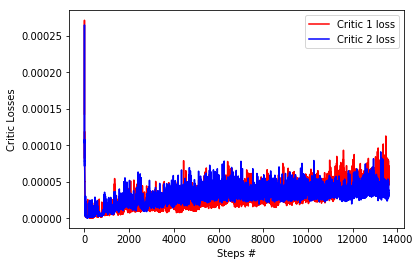

Episode 450	Average Score: 0.16, epsilon=0.8561


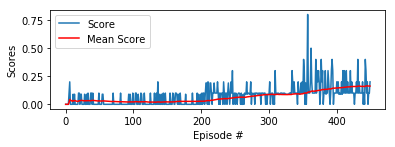

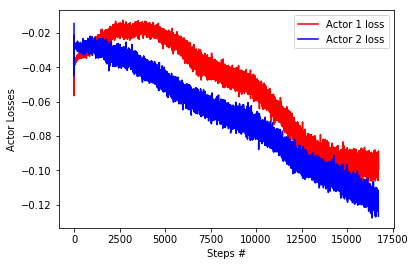

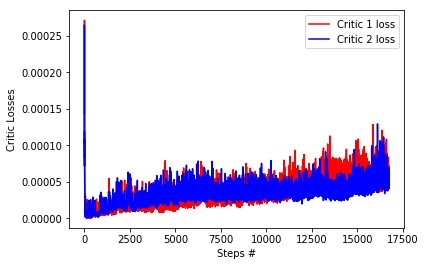

Episode 500	Average Score: 0.14, epsilon=0.8535


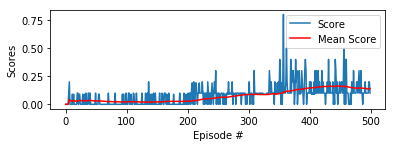

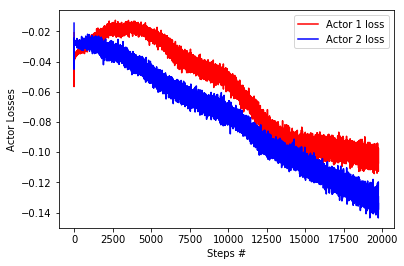

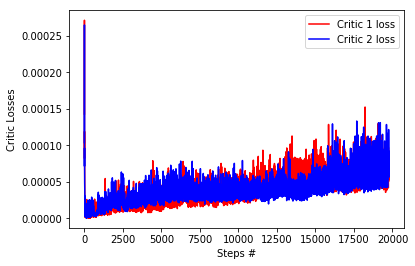

Episode 550	Average Score: 0.19, epsilon=0.8501


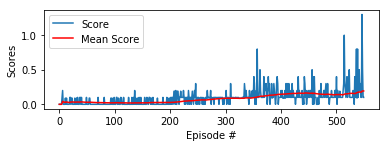

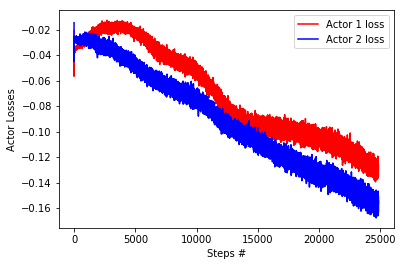

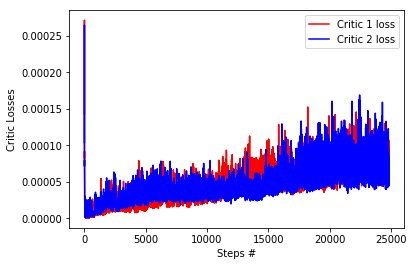

Episode 600	Average Score: 0.28, epsilon=0.8433


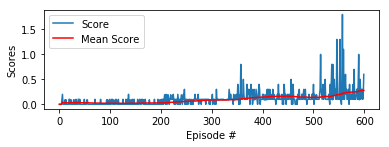

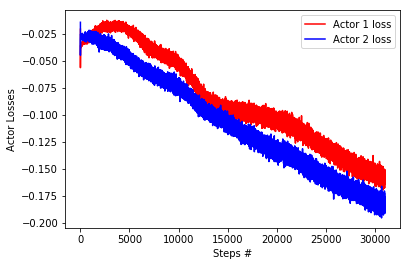

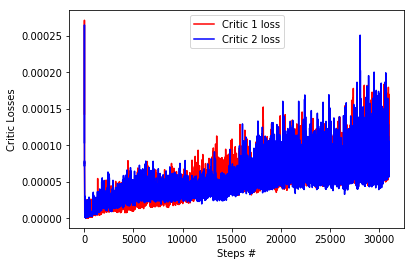

Episode 650	Average Score: 0.26, epsilon=0.8416


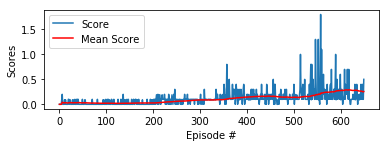

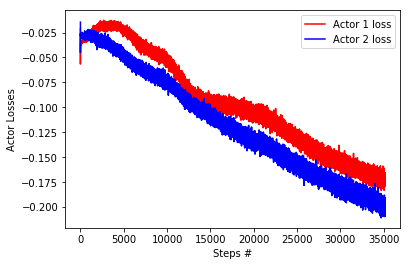

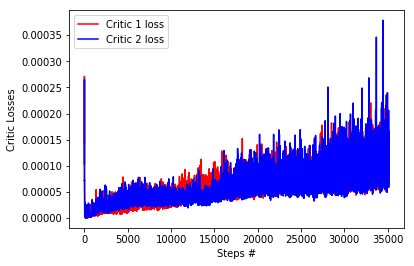

Episode 700	Average Score: 0.31, epsilon=0.8358


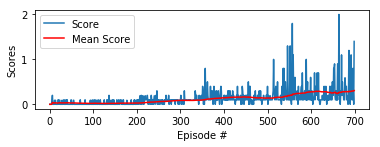

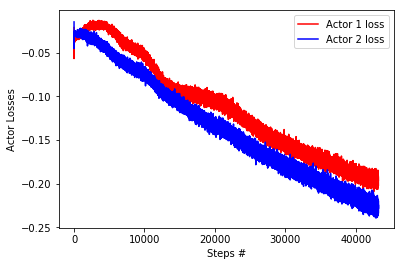

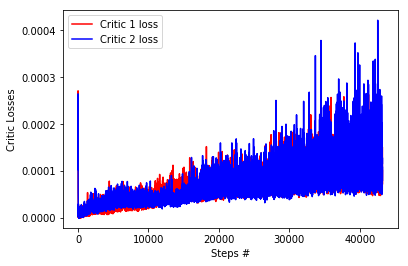

Episode 750	Average Score: 0.47, epsilon=0.8299


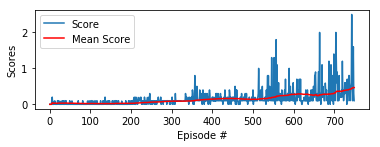

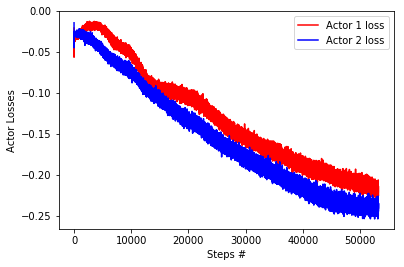

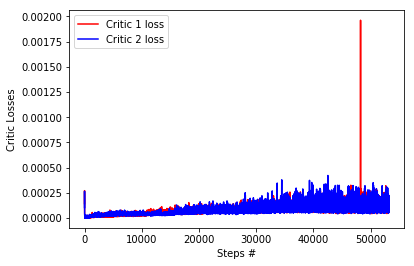

Episode 800	Average Score: 0.58, epsilon=0.8241


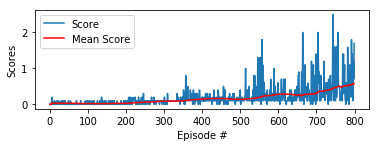

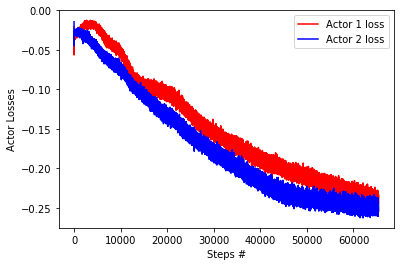

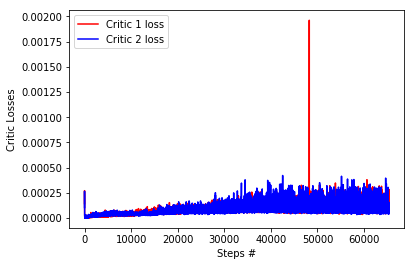

Episode 819	Average Score: 0.61, epsilon=0.8217

Target mean score of 0.60 achived at 0.61 after 819 episodes.


In [9]:
scores, actor_losses, critic_losses =  train_agent(agents, 
                      experience_buffer,
                      env, action_size, 
                      BATCH_SIZE,
                      update_every=UPDATE_EVERY,                           
                      print_metrics_every= 50,
                      target_mean_score=0.6, 
                      file_prefix="new_solution", 
                      n_episodes=1000, score_aggregate=np.max)